## MS 263 In-class problems: Feb. 27 2018

#### 1. Uncertainty in surface ocean CO$_2$ calculations

The equation for computing CO$_2$ concentrations from measurements of dissolved inorganic carbon (DIC) and pH is given by

$$ [CO_2]=  \frac{[DIC]}{\left(1+ \frac{K_1'}{H^+}+\frac{K_1'K_2'}{[H^+]^2}\right)} $$

where the dissociation constants that govern the dissociation of CO$_2$ into carbonate and bicarbonate are known from laboratory measurements and are given on a logarithmic scale as $pK'_1 = -\log{K'_1} = $ 5.847 and $pK'_2 = -\log{K'_2} = $ 8.966.

The fugacity (partial pressure, not accounting for non-ideal gas effects) of CO$_2$ can be calculated using

$$ fCO_2 = \frac{[CO_2]}{K_H}$$

where $K_{H,CO_2}$ =  3.24x10$^{-2}$ mol/(kg atm) is Henry's Law constant.

Measurements of DIC have an analytical uncertainty of +/-2 $\mu$mol/kg. Measurements of pH have an analytical uncertainty of +/- 0.0020.

Typical surface values are [DIC] $\approx$ 2000 $\mu$mol/kg and pH $\approx$ 8.1. What is the uncertainty in $fCO_2$ calculated from these values?

In [7]:
from uncertainties import ufloat
import numpy as np

dic = ufloat(2000, 2)
ph = ufloat(8.1, 0.002)
logk1 = -5.847
logk2 = -8.966
# If log is natural log
#k1 = np.exp(logk1)
#k2 = np.exp(logk2)
# If common log
k1 = 10**(logk1)
k2 = 10**(logk2)
hplus = 10**(-ph)
co2 = dic/(1 + k1/hplus + (k1*k2)/hplus**2)
kh = 3.24E-2

fco2 = co2/kh
fco2


301.94086050248677+/-1.5786397817660327

#### 2. Harmonic analysis

Fit an annual cycle to a two-year time series of monthly SST data (source: Emery and Thomson).

* Write out the problem as a system of equations, and in matrix form.
* Create a design matrix A - start with a matrix of NaNs, then fill in the columns.
* Use `np.linalg.lstsq` to solve for the coefficients.
* Plot the modeled fit on top of the data.

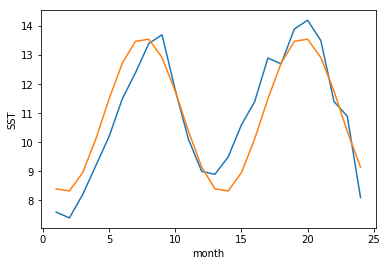

In [31]:
from matplotlib import pyplot as plt

t = np.arange(1,25)
SST = np.array([7.6, 7.4, 8.2, 9.2, 10.2, 11.5, 12.4, 13.4, 13.7, 11.8, 10.1, 9.0,
                8.9, 9.5, 10.6, 11.4, 12.9, 12.7, 13.9, 14.2, 13.5, 11.4, 10.9, 8.1])
plt.plot(t,SST)
plt.xlabel('month')
plt.ylabel('SST')

A = np.ones([len(SST),3])*np.nan
A[:,0] = 1.0
for i in range(0,len(SST)):
    A[i, 0] = 1
    A[i, 1] = np.sin(2*np.pi*(i+1)/12)
    A[i, 2] = np.cos(2*np.pi*(i+1)/12)
    
c = np.linalg.lstsq(A, SST)
consts = c[0]
c1 = consts[0]
c2 = consts[1]
c3 = consts[2]

fit = c1 + c2 * np.sin(2*np.pi*t/12) + c3 * np.cos(2*np.pi*t/12)
plt.plot(t, fit)
plt.show()

#### 3. Computing vertical gradients

Using data from one station on the West Coast Ocean Acidification cruise, estimate the vertical gradient of nitrate $\Delta N$/$\Delta z$ at locations throughout the water column. Pressure can be used as the vertical coordinate, $z$.

Use Python to make this calculation two different ways:

1. Using a for loop.
2. Not using a for loop.

Make sure that both calculations work for different profiles that have a different number of samples.

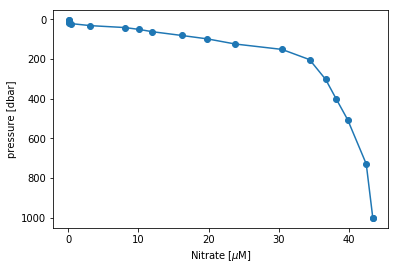

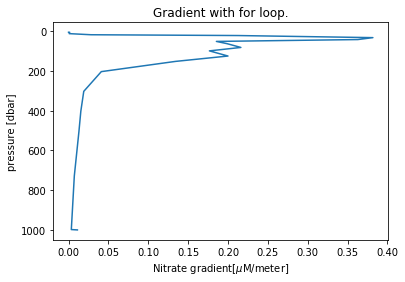

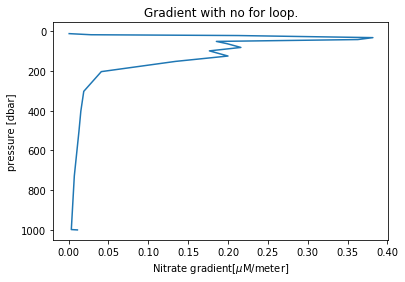

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# you may need to change this, depending on where your data file is
filename = '../week03_wcoa_cruise/WCOA2013_hy1.csv' 
df = pd.read_csv(filename,header=31,na_values=-999,
                 parse_dates=[[8,9]])

# Create a new data frame, using only cast number 12
idx = (df['STNNBR'] == 12)
cast = df.loc[idx]

plt.plot(cast['NITRAT'],cast['CTDPRS'],'-o')
plt.gca().invert_yaxis()
plt.xlabel('Nitrate [$\mu$M]')
plt.ylabel('pressure [dbar]')
plt.show()
p = np.array(cast['CTDPRS'])
nit = np.array(cast['NITRAT'])

gradient = np.ones([len(p)])*np.nan

for i in range(1, len(p)-1):
    gradient[i] = (nit[i+1] - nit[i-1])/(p[i+1] - p[i-1])
gradient[0] =  (nit[1] - nit[0])/(p[1] - p[0])
gradient[-1] =  (nit[-1] - nit[-2])/(p[-1] - p[-2])

plt.figure()
plt.plot(gradient, p)
plt.gca().invert_yaxis()
plt.xlabel('Nitrate gradient[$\mu$M/meter]')
plt.ylabel('pressure [dbar]')
plt.title('Gradient with for loop.')
plt.show()


gradient = np.ones([len(p)])*np.nan
gradient[1:-2] = (nit[2:-1]-nit[0:-3])/(p[2:-1]-p[0:-3])
gradient[0] = (nit[1]-nit[0])/(p[1]-p[0])
gradient[-1] = (nit[-1]-nit[-2])/(p[-1]-p[-2])

plt.figure()
plt.plot(gradient, p)
plt.gca().invert_yaxis()
plt.xlabel('Nitrate gradient[$\mu$M/meter]')
plt.ylabel('pressure [dbar]')
plt.title('Gradient with no for loop.')
plt.show()

#### 4. Plot loop

Create a for loop that loops through the following variables, and plots all available data from the WCOA cruise as a function of pressure (use pressure as the vertical coordinate).

<IPython.core.display.Javascript object>


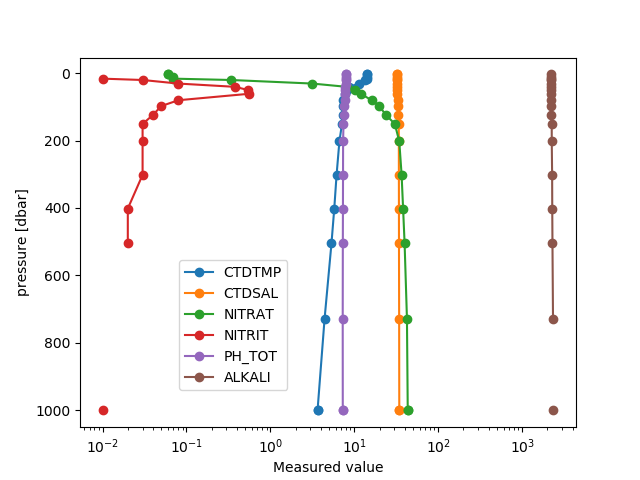

In [90]:
variables_to_plot = ['CTDTMP','CTDSAL','NITRAT','NITRIT','PH_TOT','ALKALI']
%matplotlib notebook

for var in variables_to_plot:
    # insert code here
    plt.semilogx(cast[var],cast['CTDPRS'],'-o', label=var)
    
plt.gca().invert_yaxis()
plt.xlabel('Measured value')
plt.ylabel('pressure [dbar]')
plt.legend(loc=[0.2, 0.1])
plt.show()

<IPython.core.display.Javascript object>


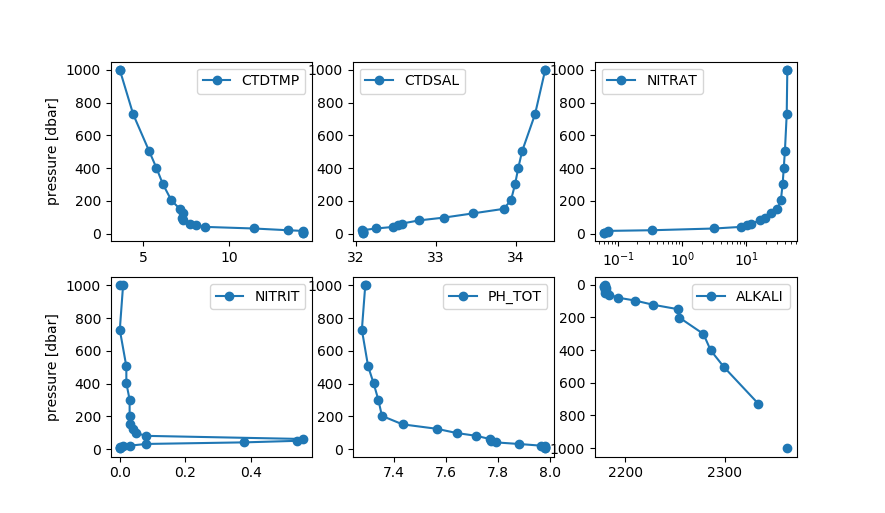

In [89]:
# Version 2 - subplots
plt.figure()
variables_to_plot = ['CTDTMP','CTDSAL','NITRAT','NITRIT','PH_TOT','ALKALI']

i = 0
for var in variables_to_plot:
    i = i + 1
    #plt.subplot(1, len(variables_to_plot), i)
    plt.subplot(2, 3, i)
    if min(cast[var]) > 0 and max(cast[var])/min(cast[var]) > 10:
        plt.semilogx(cast[var],cast['CTDPRS'],'-o', label=var)
    else:
        plt.plot(cast[var],cast['CTDPRS'],'-o', label=var)
    if i == 1 or i == 4:
        plt.ylabel('pressure [dbar]')
    #plt.xlabel(var)
    plt.legend()
    
plt.gca().invert_yaxis()
#plt.legend(loc=[0.2, 0.1])
plt.show()